In [1]:
from distribution import TestDistribution

from RTER import RegressionTree

import numpy as np

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from time import time
import os



In [3]:


#distribution_index_vec=[1,2,3,4]





np.random.seed(1)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 1000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate_true(n_test)



# RTER with cv
time_start=time()
parameters={"truncate_ratio_low":[0.1,0.2,0.3 ], "truncate_ratio_up":[0.6,0.7,0.8 ],
           "min_samples_split":[10,20,30,50,100], "max_depth":[1,2,3,4,5],
           "order":[1,2,3]}
cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=-1)
cv_model_RTER.fit(X_train, Y_train)

RTER_model = cv_model_RTER.best_estimator_
mse_score= - RTER_model.score(X_test, Y_test)
y_hat_RTER = RTER_model.predict(X_test)

time_end=time()

print("RTER: mse {} time {}".format(mse_score,time_end-time_start))


# GBRT
time_start=time()

model_GBRT = GradientBoostingRegressor(n_estimators = 3000)
model_GBRT.fit(X_train, Y_train.ravel())

y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("GBRT: mse {} time {}".format(mse_score,time_end-time_start))


# RF
time_start=time()

model_RFR = RandomForestRegressor(n_estimators = 200)
model_RFR.fit(X_train, Y_train.ravel())

y_hat=model_RFR.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("GBRT: mse {} time {}".format(mse_score,time_end-time_start))

RTER: mse 0.024249498559604708 time 7.873650789260864
GBRT: mse 0.5736846435473859 time 2.338783025741577
GBRT: mse 0.4656688403874005 time 0.5070860385894775


In [4]:
y_hat_RTER

array([11.89643913,  6.43817857,  5.46900794, 10.05372774,  5.98628785,
       10.40427132, 10.33312649,  6.39654125,  5.74314815,  7.72689005,
        5.97830056, 12.46755694,  6.36952187,  6.32394039,  5.12964627,
       12.52909674,  5.98987261,  6.2716166 ,  9.16290668,  6.40850473,
        6.47305587,  6.05325086, 12.57417835, 10.35848065,  4.95507872,
        5.95156142,  9.00896407,  9.78596361, 10.95573402,  9.94706939,
       11.3939635 ,  7.24367876, 11.25994017,  6.28293338,  8.44776851,
        8.38048735,  6.1693261 ,  5.75007871,  7.72582566,  9.85165603,
       10.1648879 ,  7.80426493,  5.83740068,  7.78975413,  7.93205392,
        9.5001387 , 10.54501485, 12.34087343, 10.38346332,  8.34762218,
       11.00550779,  7.65820448,  7.915928  ,  5.68245547, 12.38138748,
        5.89588946,  7.87281686,  7.53581729,  4.72667732,  6.94395781,
        9.9960318 , 11.13112027, 10.14846806,  5.48574784,  7.73775993,
        9.49205677,  9.58641261,  8.98012098,  9.25394285,  6.58

In [5]:
Y_test

array([15.44935695,  7.1463914 ,  4.62990469,  9.3650518 ,  9.84127493,
       10.00273075, 12.88585393,  4.35137529,  5.96127681,  7.66773808,
        5.77238758, 14.71842843,  4.50610248,  4.49164631,  3.95117263,
       14.41701228,  5.44049424,  5.68110512, 13.93166276,  7.24965812,
        8.68068039,  7.7588115 , 11.86489081, 12.52730604,  5.24883548,
        5.79414851, 11.6027951 , 12.1236228 , 16.93245407, 11.46437731,
       11.55355154, 12.33297041, 15.85975737,  2.06769842,  9.30762684,
        6.43896813,  7.49485328,  8.62976614,  8.47182216, 14.6270823 ,
       11.67256232,  8.74105923,  7.51949576,  5.81064118,  9.12694026,
       11.46957823, 14.36511789, 14.46305142, 13.21456262, 13.3675045 ,
        9.99462093,  7.35770834,  9.29190993,  8.772765  , 16.90353492,
        8.26605369, 10.83492941,  9.65932245,  7.3649629 ,  9.89421933,
       13.10460521, 14.20264918, 14.23574482,  7.86879585,  6.60485596,
       11.2932871 , 12.02356491, 13.26868716,  8.23396518,  4.42

In [6]:
X_test

array([[0.84581526, 0.89446604, 0.73081873, ..., 0.86087558, 0.92590301,
        0.06980518],
       [0.54507672, 0.01355775, 0.67062826, ..., 0.55711447, 0.69249026,
        0.53012168],
       [0.68637368, 0.94574351, 0.12885809, ..., 0.46650391, 0.53082395,
        0.58024817],
       ...,
       [0.55031031, 0.69306678, 0.75723956, ..., 0.85510812, 0.15535141,
        0.59723653],
       [0.0278884 , 0.14104428, 0.076457  , ..., 0.91982004, 0.68050318,
        0.10096337],
       [0.41993117, 0.05935548, 0.91228409, ..., 0.8598144 , 0.00272391,
        0.51421236]])

In [4]:
cv_model_RTER.best_params_

{'max_depth': 3,
 'min_samples_split': 10,
 'order': 1,
 'truncate_ratio_low': 0.2,
 'truncate_ratio_up': 0.7}

In [6]:
import matplotlib.pyplot as plt

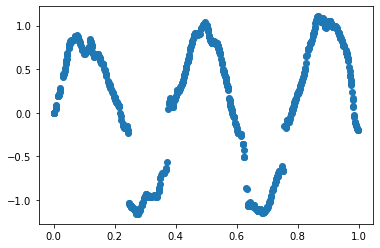

In [7]:
plt.scatter(X_test.ravel(), y_hat_RTER)